<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Building Autoencoders**


Estimated time needed: **30** minutes


In this lab, you will learn how to build autoencoders using Keras.  


## Learning Objectives

By the end of this lab, you will: 

- Load and preprocess the MNIST dataset for training an autoencoder. 

- Construct a simple autoencoder model using the Keras functional API. 

- Train the autoencoder on the MNIST dataset. 

- Evaluate the performance of the trained autoencoder. 

- Fine-tune the autoencoder to improve its performance. 

- Use the autoencoder to denoise images. 


----


### Step-by-Step Instructions: 

#### Step 1: Data Preprocessing 

This exercise prepares the MNIST dataset for training by normalizing the pixel values and flattening the images. Normalization helps in faster convergence during training, and flattening is required because the input layer of our autoencoder expects a one-dimensional vector. 


In [ ]:
# !pip install tensorflow==2.16.2

In [1]:
import numpy as np 
from tensorflow.keras.datasets import mnist 

# Load the dataset 
(x_train, _), (x_test, _) = mnist.load_data() 

# Normalize the pixel values 
x_train = x_train.astype('float32') / 255. 
x_test = x_test.astype('float32') / 255. 

# Flatten the images 
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:]))) 
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:]))) 

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In the above code: 
- Use Keras to load the MNIST dataset. 
- Normalize the image pixel values to the range [0, 1]. 
- Flatten the 28x28 images to a 784-dimensional vector to reshape the data. 


#### Step 2: Building the Autoencoder Model 

This exercise involves building an autoencoder with an encoder that compresses the input to 32 dimensions and a decoder that reconstructs the input from these 32 dimensions. The model is compiled with the Adam optimizer and binary crossentropy loss. 


In [2]:
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Input, Dense 

# Encoder 
input_layer = Input(shape=(784,)) 
encoded = Dense(64, activation='relu')(input_layer) 

# Bottleneck 
bottleneck = Dense(32, activation='relu')(encoded) 

# Decoder 
decoded = Dense(64, activation='relu')(bottleneck) 
output_layer = Dense(784, activation='sigmoid')(decoded) 

# Autoencoder model 
autoencoder = Model(input_layer, output_layer) 

# Compile the model 
autoencoder.compile(optimizer='adam', loss='binary_crossentropy') 

# Summary of the model 
autoencoder.summary() 

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 784)            │        50,960 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,392 (411.69 KB)

 Trainable params: 105,392 (411.69 KB)

 Non-trainable params: 0 (0.00 B)

In the above code: 

**1. Define the Encoder:**
- Create an input layer with 784 neurons. 
- Add a Dense layer with 64 neurons and ReLU activation. 

**2. Define the Bottleneck:**
- Add a Dense layer with 32 neurons and ReLU activation. 

**3. Define the Decoder:**
- Add a Dense layer with 64 neurons and ReLU activation. 
- Add an output layer with 784 neurons and sigmoid activation. 

**4. Compile the Model:**
- Use the Adam optimizer and binary crossentropy loss.  


#### Step 3: Training the Autoencoder 

In this exercise, the autoencoder is trained to reconstruct the MNIST images. The training data is both the input and the target, as the autoencoder learns to map the input to itself. 


In [3]:
autoencoder.fit(
    x_train, x_train,  
    epochs=25,  
    batch_size=256,  
    shuffle=True,  
    validation_data=(x_test, x_test)
)

Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3591 - val_loss: 0.1747
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1661 - val_loss: 0.1405
Epoch 3/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1369 - val_loss: 0.1259
Epoch 4/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1252 - val_loss: 0.1183
Epoch 5/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1185 - val_loss: 0.1135
Epoch 6/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1139 - val_loss: 0.1096
Epoch 7/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1102 - val_loss: 0.1071
Epoch 8/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1083 - val_loss: 0.1058
Epoch 9/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1064 - val_loss: 0.1037
Epoch 10/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1048 - val_loss: 0.1022
Epoch 11/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1037 - val_loss: 0.1016
Epoch 12/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

In the above code: 
- Use the `fit` method to train the model on the training data. 
- Set the number of epochs to 25 and the batch size to 256.. 
- Use the test data for validation. 


#### Step 4: Evaluating the Autoencoder 

This exercise evaluates the autoencoder by reconstructing the test images and comparing them to the original images. Visualization helps in understanding how well the autoencoder has learned to reconstruct the input data. 


In [ ]:
# !pip install matplotlib==3.9.2

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step


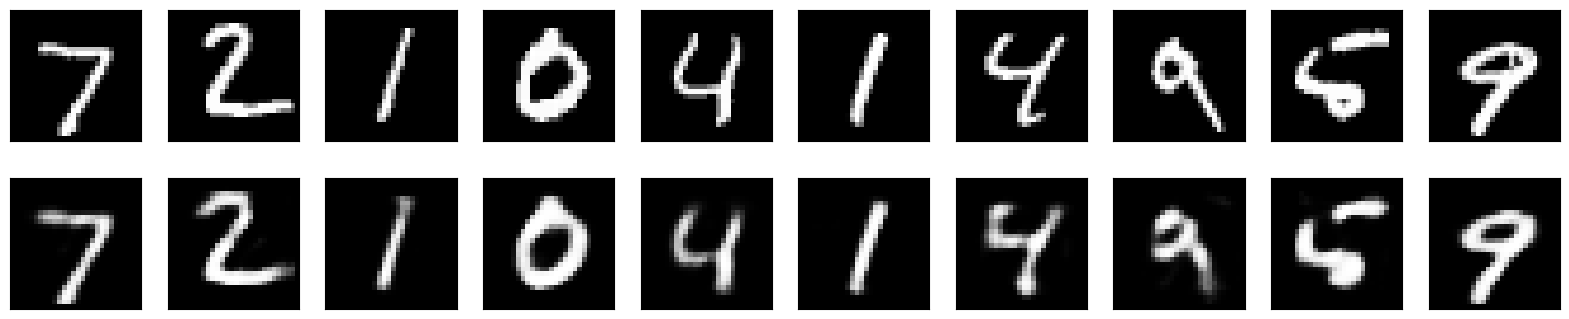

In [4]:
import matplotlib.pyplot as plt 

# Predict the test data 
reconstructed = autoencoder.predict(x_test) 

# Visualize the results 
n = 10  # Number of digits to display 
plt.figure(figsize=(20, 4)) 

for i in range(n): 
    # Display original 
    ax = plt.subplot(2, n, i + 1) 
    plt.imshow(x_test[i].reshape(28, 28)) 
    plt.gray() 
    ax.get_xaxis().set_visible(False) 
    ax.get_yaxis().set_visible(False) 

    # Display reconstruction 
    ax = plt.subplot(2, n, i + 1 + n) 
    plt.imshow(reconstructed[i].reshape(28, 28)) 
    plt.gray() 
    ax.get_xaxis().set_visible(False) 
    ax.get_yaxis().set_visible(False) 

plt.show()


In the above code: 

**1. Reconstruct Images:**
- Use the autoencoder to predict the test data. 
- Compare the original test images with the reconstructed images. 

**2. Visualize the Results:**
- Plot a few examples of original and reconstructed images side by side. 


#### Step 5: Fine-Tuning the Autoencoder 

Fine-tuning the autoencoder by unfreezing some layers can help in improving its performance. In this exercise, you unfreeze the last four layers and train the model again for a few more epochs.


In [5]:
# Freeze all layers of the autoencoder
for layer in autoencoder.layers:
    layer.trainable = False


In [6]:
# Check trainable status of each layer
for i, layer in enumerate(autoencoder.layers):
    print(f"Layer {i}: {layer.name}, Trainable = {layer.trainable}")


Layer 0: input_layer, Trainable = False
Layer 1: dense, Trainable = False
Layer 2: dense_1, Trainable = False
Layer 3: dense_2, Trainable = False
Layer 4: dense_3, Trainable = False


In [7]:
# Unfreeze the top layers of the encoder
for layer in autoencoder.layers[-4:]: 
    layer.trainable = True 

# Compile the model again
autoencoder.compile(optimizer='adam', loss='binary_crossentropy') 

# Train the model again
autoencoder.fit(x_train, x_train,  
                epochs=10,  
                batch_size=256,  
                shuffle=True,  
                validation_data=(x_test, x_test))


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0946 - val_loss: 0.0922
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0930 - val_loss: 0.0918
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0930 - val_loss: 0.0917
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0928 - val_loss: 0.0915
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0924 - val_loss: 0.0913
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0923 - val_loss: 0.0910
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0919 - val_loss: 0.0908
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0916 - val_loss: 0.0906
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0916 - val_loss: 0.0906
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0914 - val_loss: 0.0903


In the above code: 

**1. Freeze all the Encoder Layers:**
- Freeze all the layers of the encoder.

**2. Check the Status:**
- Checking the trainable status of each layer. 

**3. Unfreeze the Encoder Layers:**
- Unfreeze the last four layers of the encoder. 

**4. Compile and Train the Model:**
- Recompile the model. 
- Train the model again for 10 epochs with the same training and validation data.


#### Step 6: Denoising Images with Autoencoder 

In this exercise, you add random noise to the dataset and train the autoencoder to denoise the images. The autoencoder learns to reconstruct the original images from the noisy input, which can be visualized by comparing the noisy, denoised, and original images. 


Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2204 - val_loss: 0.1461
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1438 - val_loss: 0.1354
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1350 - val_loss: 0.1307
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1307 - val_loss: 0.1282
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1281 - val_loss: 0.1266
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1267 - val_loss: 0.1253
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1255 - val_loss: 0.1243
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1243 - val_loss: 0.1239
Epoch 9/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1240 - val_loss: 0.1234
Epoch 10/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1237 - val_loss: 0.1231
Epoch 11/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1230 - val_loss: 0.1225
Epoch 12/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step

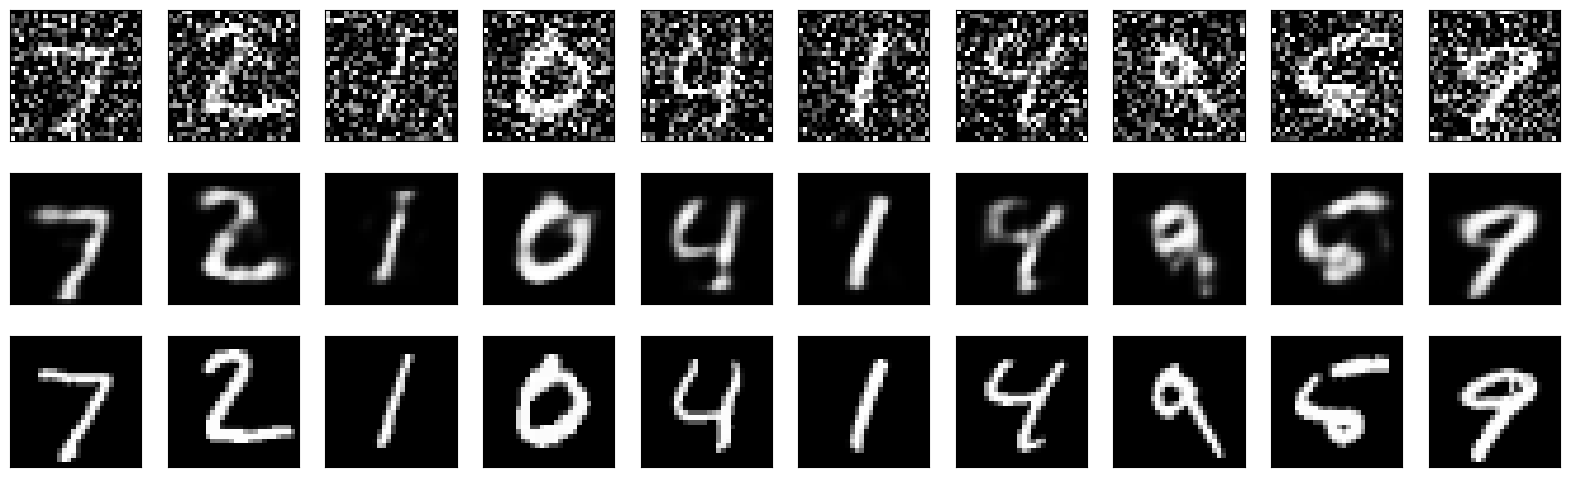

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Add noise to the data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Train the autoencoder with noisy data
autoencoder.fit(
    x_train_noisy, x_train,
    epochs=20,
    batch_size=512,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)

# Denoise the test images
reconstructed_noisy = autoencoder.predict(x_test_noisy)

# Visualize the results
n = 10  # Number of digits to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display noisy images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display denoised images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(reconstructed_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display original images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


In the above code: 

**1. Add noise to the data:**
- Add random noise to the training and test data. 
- Train the Autoencoder with noisy data: 
-Train the autoencoder using the noisy images as input and the original images as target. 

**2. Evaluate the denoising performance:**
- Use the autoencoder to denoise the test images. 
- Compare the noisy, denoised, and original images. 


## Practice Exercises: 

### Exercise 1: Exploring Different Bottleneck Sizes 

#### Objective: 

To understand the impact of different bottleneck sizes on the performance of the autoencoder. 

#### Instructions: 

**1. Define new models with different bottleneck sizes:**
- Create three new autoencoder models, each with a different bottleneck size (e.g., 16, 32, and 64 neurons). 
- Use the same encoder and decoder architecture as in the main lab but change the number of neurons in the bottleneck layer. 

**2. Train the models:**
- Train each model on the MNIST dataset for 50 epochs with a batch size of 256. 
- Use the same preprocessing steps as in the main lab. 

**3. Evaluate and Compare the Models:**
- Evaluate the performance of each model on the test data. 
- Compare the reconstruction loss of the models to understand how the bottleneck size affects the autoencoder's ability to reconstruct the input data. 


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 784)            │        50,960 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,328 (403.62 KB)

 Trainable params: 103,328 (403.62 KB)

 Non-trainable params: 0 (0.00 B)

None


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 784)            │        50,960 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,392 (411.69 KB)

 Trainable params: 105,392 (411.69 KB)

 Non-trainable params: 0 (0.00 B)

None


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 784)            │        50,960 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,520 (427.81 KB)

 Trainable params: 109,520 (427.81 KB)

 Non-trainable params: 0 (0.00 B)

None
Training autoencoder with bottleneck of 16 Neurons 

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3597 - val_loss: 0.1735
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1675 - val_loss: 0.1508
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1482 - val_loss: 0.1386
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1389 - val_loss: 0.1335
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1343 - val_loss: 0.1305
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1313 - val_loss: 0.1283
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1291 - val_loss: 0.1262
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1272 - val_loss: 0.1245
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1258 - val_loss: 0.1234
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1247 - val_loss: 0.1222
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1236 - val_loss: 0

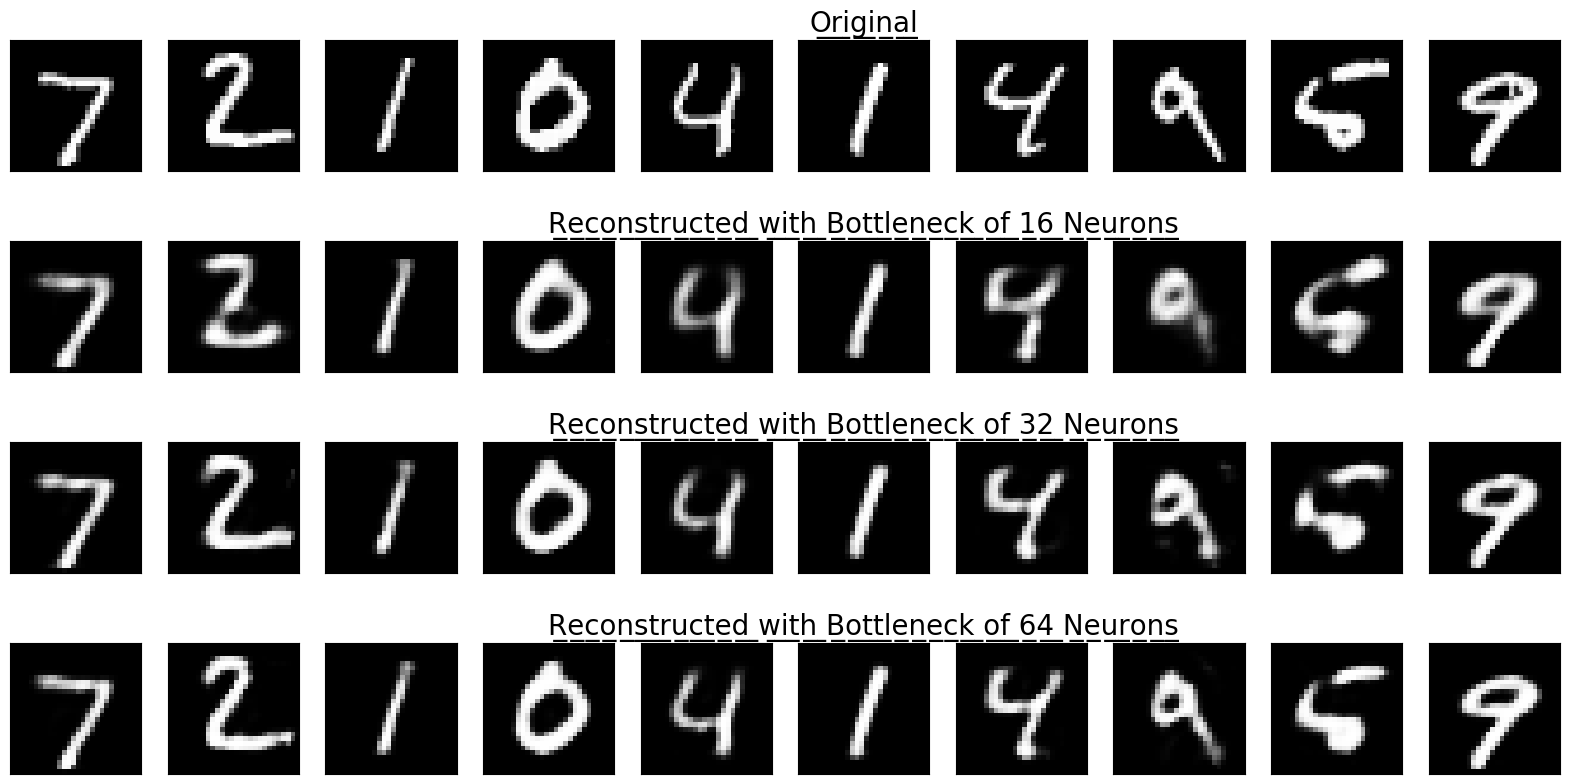

In [28]:
# Write your code here
# Autoencoder 1 for bottleneck size of 16 neurons
input_layer = Input(shape=(784,)) 
encoded = Dense(64, activation='relu')(input_layer) 

# Bottleneck 
bottleneck1 = Dense(16, activation='relu')(encoded) 

# Decoder 
decoded = Dense(64, activation='relu')(bottleneck1) 
output_layer = Dense(784, activation='sigmoid')(decoded) 

# Autoencoder model 
autoencoder1 = Model(input_layer, output_layer) 

# Compile the model 
autoencoder1.compile(optimizer='adam', loss='binary_crossentropy') 

# Summary of the model 
print(autoencoder1.summary())

# Autoencoder 2 for bottleneck size of 32 neurons

input_layer = Input(shape=(784,)) 
encoded = Dense(64, activation='relu')(input_layer) 

# Bottleneck 
bottleneck2 = Dense(32, activation='relu')(encoded) 

# Decoder 
decoded = Dense(64, activation='relu')(bottleneck2) 
output_layer = Dense(784, activation='sigmoid')(decoded) 

# Autoencoder model 
autoencoder2 = Model(input_layer, output_layer) 

# Compile the model 
autoencoder2.compile(optimizer='adam', loss='binary_crossentropy') 

# Summary of the model 
print(autoencoder2.summary())

# Autoencoder 3 for bottleneck size of 64 neurons

input_layer = Input(shape=(784,)) 
encoded = Dense(64, activation='relu')(input_layer) 

# Bottleneck 
bottleneck3 = Dense(64, activation='relu')(encoded) 

# Decoder 
decoded = Dense(64, activation='relu')(bottleneck3) 
output_layer = Dense(784, activation='sigmoid')(decoded) 

# Autoencoder model 
autoencoder3 = Model(input_layer, output_layer) 

# Compile the model 
autoencoder3.compile(optimizer='adam', loss='binary_crossentropy') 

# Summary of the model 
print(autoencoder3.summary())

#Training the 3 models
print('Training autoencoder with bottleneck of 16 Neurons \n')
autoencoder1.fit(x_train, x_train,epochs=50,batch_size=256,shuffle=True,validation_data=(x_test, x_test))
print('Training autoencoder with bottleneck of 32 Neurons \n')
autoencoder2.fit(x_train, x_train,epochs=50,batch_size=256,shuffle=True,validation_data=(x_test, x_test))
print('Training autoencoder with bottleneck of 64 Neurons \n')
autoencoder3.fit(x_train, x_train,epochs=50,batch_size=256,shuffle=True,validation_data=(x_test, x_test))

#Evaluation and Comparison
print('Evaluating autoencoder with bottleneck of 16 Neurons \n')
reconstructed1 = autoencoder1.predict(x_test) 
print('Evaluating autoencoder with bottleneck of 32 Neurons \n')
reconstructed2 = autoencoder2.predict(x_test) 
print('Evaluating autoencoder with bottleneck of 64 Neurons \n')
reconstructed3 = autoencoder3.predict(x_test) 

def underline(text):
    return ''.join(char + '\u0332' for char in text)


print('RESULTS: \n')

# Visualize the results 
plt.figure(figsize=(20, 10)) 
for i in range(n): 
    # Display original 
    ax = plt.subplot(4, n, i + 1) 
    if i == n/2:
        ax.set_title(underline('Original'),fontsize=20)
    plt.imshow(x_test[i].reshape(28, 28)) 
    plt.gray() 
    ax.get_xaxis().set_visible(False) 
    ax.get_yaxis().set_visible(False) 

    # Display reconstruction for 16 neurons model
    ax = plt.subplot(4, n, i + 1 + n) 
    if i == n/2:
        ax.set_title(underline('Reconstructed with Bottleneck of 16 Neurons'),fontsize=20)
    plt.imshow(reconstructed1[i].reshape(28, 28)) 
    plt.gray() 
    ax.get_xaxis().set_visible(False) 
    ax.get_yaxis().set_visible(False) 

    # Display reconstruction for 32 neurons model
    ax = plt.subplot(4, n, i + 1 + 2 * n)
    if i == n/2:
        ax.set_title(underline('Reconstructed with Bottleneck of 32 Neurons'),fontsize=20)
    plt.imshow(reconstructed2[i].reshape(28, 28))
    plt.gray()
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction for 64 neurons model
    ax = plt.subplot(4, n, i + 1 + 3 * n)
    if i == n/2:
        ax.set_title(underline('Reconstructed with Bottleneck of 64 Neurons'),fontsize=20)
    plt.imshow(reconstructed3[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


<details>
    <summary>Click here for Solution</summary>

```python
# Define and train three different autoencoders with varying bottleneck sizes
bottleneck_sizes = [16, 32, 64]
autoencoders = []

for size in bottleneck_sizes:
    # Encoder
    input_layer = Input(shape=(784,))
    encoded = Dense(64, activation='relu')(input_layer)
    bottleneck = Dense(size, activation='relu')(encoded)

    # Decoder
    decoded = Dense(64, activation='relu')(bottleneck)
    output_layer = Dense(784, activation='sigmoid')(decoded)

    # Autoencoder model
    autoencoder = Model(input_layer, output_layer)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    autoencoder.fit(
        x_train,
        x_train,
        epochs=20,
        batch_size=256,
        shuffle=True,
        validation_data=(x_test, x_test)
    )
    autoencoders.append(autoencoder)

# Evaluate and compare the models
for i, size in enumerate(bottleneck_sizes):
    loss = autoencoders[i].evaluate(x_test, x_test)
    print(f'Bottleneck size {size} - Test loss: {loss}')
```

</details>


### Exercise 2 - Adding Regularization to the Autoencoder 
 
#### Objective: 

To explore the effect of regularization on the performance of the autoencoder. 

#### Instructions: 

**1. Modify the model:**
- Add L2 regularization to the Dense layers in both the encoder and decoder parts of the autoencoder. 

**2. Train the model:**
- Train the modified autoencoder on the MNIST dataset for 50 epochs with a batch size of 256. 

**3. Evaluate and compare:**
- Evaluate the performance of the regularized autoencoder and compare it with the non-regularized version. 


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 784)            │        50,960 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,392 (411.69 KB)

 Trainable params: 105,392 (411.69 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.7862 - val_loss: 0.4411
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4221 - val_loss: 0.3947
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3913 - val_loss: 0.3794
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3766 - val_loss: 0.3655
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3628 - val_loss: 0.3531
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3505 - val_loss: 0.3429
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3409 - val_loss: 0.3352
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3336 - val_loss: 0.3285
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3272 - val_loss: 0.3229
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3216 - val_loss: 0.3174
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3160 - val_loss: 0.3125
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms

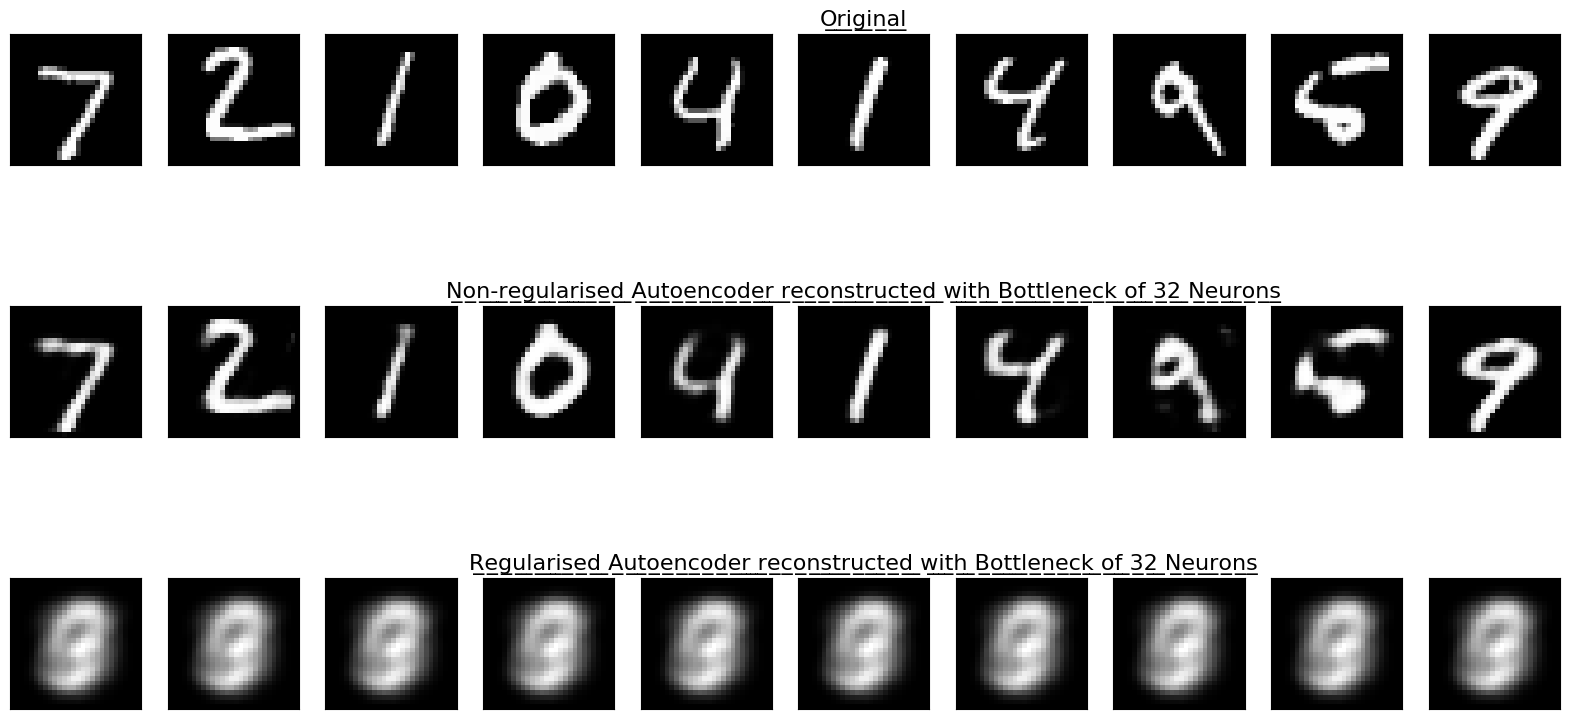

In [31]:
# Write your code here
from tensorflow.keras.regularizers import l2
input_layer = Input(shape=(784,)) 
encoded = Dense(64, activation='relu',kernel_regularizer=l2(0.01))(input_layer) 

# Bottleneck 
bottleneck4 = Dense(32, activation='relu',kernel_regularizer=l2(0.01))(encoded) 

# Decoder 
decoded = Dense(64, activation='relu',kernel_regularizer=l2(0.01))(bottleneck4) 
output_layer = Dense(784, activation='sigmoid',kernel_regularizer=l2(0.01))(decoded) 

# Autoencoder model 
autoencoder4 = Model(input_layer, output_layer) 

# Compile the model 
autoencoder4.compile(optimizer='adam', loss='binary_crossentropy') 

# Summary of the model 
print(autoencoder4.summary())

# Train the autoencoder model
autoencoder4.fit(x_train,x_train,epochs=50,batch_size=256,shuffle=True,validation_data=(x_test,x_test))

# Evaluate the model and compare with non-regularized model (Bottleneck == 32)
reconstructed4=autoencoder4.predict(x_test)

# Visualise
plt.figure(figsize=(20, 10)) 
for i in range(n): 
    # Display original 
    ax = plt.subplot(3, n, i + 1) 
    if i == n/2:
        ax.set_title(underline('Original'),fontsize=16)
    plt.imshow(x_test[i].reshape(28, 28)) 
    plt.gray() 
    ax.get_xaxis().set_visible(False) 
    ax.get_yaxis().set_visible(False) 

    # Display reconstruction for 16 neurons model
    ax = plt.subplot(3, n, i + 1 + n) 
    if i == n/2:
        ax.set_title(underline('Non-regularised Autoencoder reconstructed with Bottleneck of 32 Neurons'),fontsize=16)
    plt.imshow(reconstructed2[i].reshape(28, 28)) 
    plt.gray() 
    ax.get_xaxis().set_visible(False) 
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3, n, i + 1 + 2 * n)
    if i == n/2:
        ax.set_title(underline('Regularised Autoencoder reconstructed with Bottleneck of 32 Neurons'),fontsize=16)
    plt.imshow(reconstructed4[i].reshape(28, 28))
    plt.gray()
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [32]:
loss=autoencoder4.evaluate(x_test,x_test)
print(f"Regularized Autoencoder - Test Loss= ",loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - loss: 0.2578
Regularized Autoencoder - Test Loss=  0.2631966173648834


<details>
    <summary>Click here for Solution</summary>

```python

from tensorflow.keras.regularizers import l2 

# Encoder with L2 regularization 
input_layer = Input(shape=(784,)) 
encoded = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(input_layer) 
bottleneck = Dense(32, activation='relu', kernel_regularizer=l2(0.01))(encoded) 

# Decoder with L2 regularization 
decoded = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(bottleneck) 
output_layer = Dense(784, activation='sigmoid', kernel_regularizer=l2(0.01))(decoded) 

# Autoencoder model with L2 regularization 
autoencoder_regularized = Model(input_layer, output_layer) 
autoencoder_regularized.compile(optimizer='adam', loss='binary_crossentropy') 

# Train the model 
autoencoder_regularized.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test)) 

# Evaluate the model 
loss = autoencoder_regularized.evaluate(x_test, x_test) 
print(f'Regularized Autoencoder - Test loss: {loss}') 
```

</details>


### Exercise 3 - Visualizing Intermediate Representations 

#### Objective: 

To visualize and understand the intermediate representations (encoded features) learned by the autoencoder. 

#### Instructions: 

**1. Extract Encoder Part:**
- Extract the encoder part of the trained autoencoder to create a separate model that outputs the encoded features. 

**2. Visualize Encoded Features:**
- Use the encoder model to transform the test data into the encoded space. 
- Plot the encoded features using a scatter plot for the first two dimensions of the encoded space. 


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step


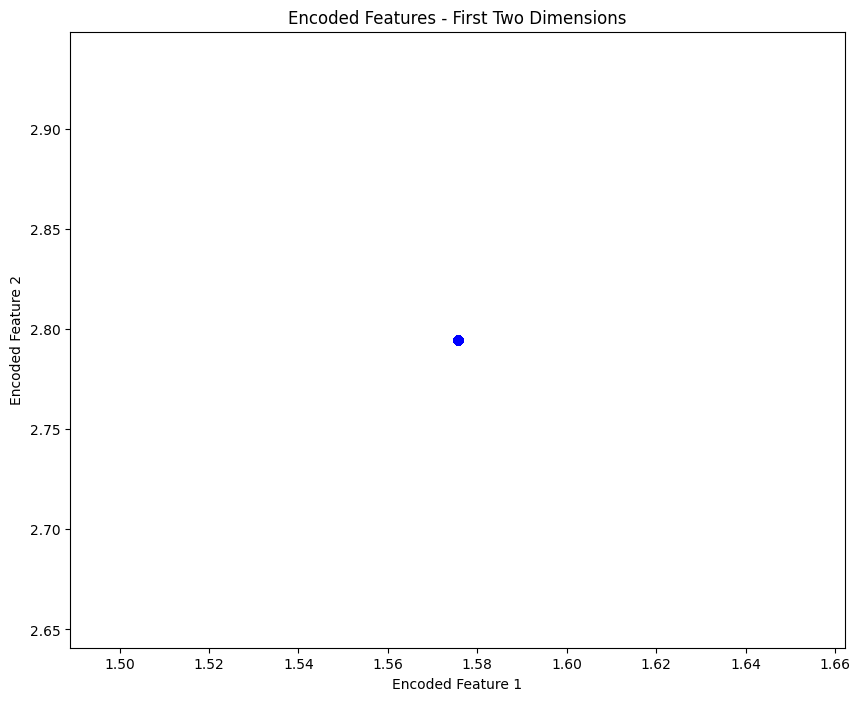

In [36]:
# Writw your code here
encoded_model = Model(inputs=input_layer, outputs=bottleneck4)  
encoded_imgs = encoded_model.predict(x_test) 

plt.figure(figsize=(10, 8)) 
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c='blue', alpha=0.5) 
plt.title('Encoded Features - First Two Dimensions') 
plt.xlabel('Encoded Feature 1') 
plt.ylabel('Encoded Feature 2') 
plt.show()

<details>
    <summary>Click here for Solution</summary>

```python

import matplotlib.pyplot as plt 

# Extract the encoder part of the autoencoder 
encoder_model = Model(input_layer, bottleneck) 

# Encode the test data 
encoded_imgs = encoder_model.predict(x_test) 

# Visualize the first two dimensions of the encoded features 
plt.figure(figsize=(10, 8)) 
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c='blue', alpha=0.5) 
plt.title('Encoded Features - First Two Dimensions') 
plt.xlabel('Encoded Feature 1') 
plt.ylabel('Encoded Feature 2') 
plt.show() 
```

</details>


#### Conclusion: 

Congratulations on completing this lab! In this lab, you have gained practical experience in building, training, and evaluating autoencoders using Keras. You have learned to preprocess data, construct a basic autoencoder architecture, train the model on the MNIST dataset, and visualize the results. Additionally, you explored fine-tuning techniques to enhance the model's performance and applied the autoencoder to denoise images. 

Continue experimenting with different architectures, datasets, and applications to further deepen your knowledge and skills in using autoencoders. The concepts and techniques you have learned in this lab will serve as a foundation for more advanced topics in deep learning. 


## Authors


Skills Network


Copyright © IBM Corporation. All rights reserved.
